# Solving Simple TSP using Simulated Annealing

In [8]:
from optalgotools.algorithms import SimulatedAnnealing
from optalgotools.problems import TSP
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# distance between the 5 cities
dists = [ [0] * 5 for _ in range(5)]
dists[0][1] = dists[1][0] = 4
dists[0][2] = dists[2][0] = 2
dists[0][3] = dists[3][0] = 9
dists[0][4] = dists[4][0] = 12
dists[1][2] = dists[2][1] = 7
dists[1][3] = dists[3][1] = 5
dists[1][4] = dists[4][1] = 5
dists[2][3] = dists[3][2] = 4
dists[2][4] = dists[4][2] = 10
dists[3][4] = dists[4][3] = 3
dists

[[0, 4, 2, 9, 12],
 [4, 0, 7, 5, 5],
 [2, 7, 0, 4, 10],
 [9, 5, 4, 0, 3],
 [12, 5, 10, 3, 0]]

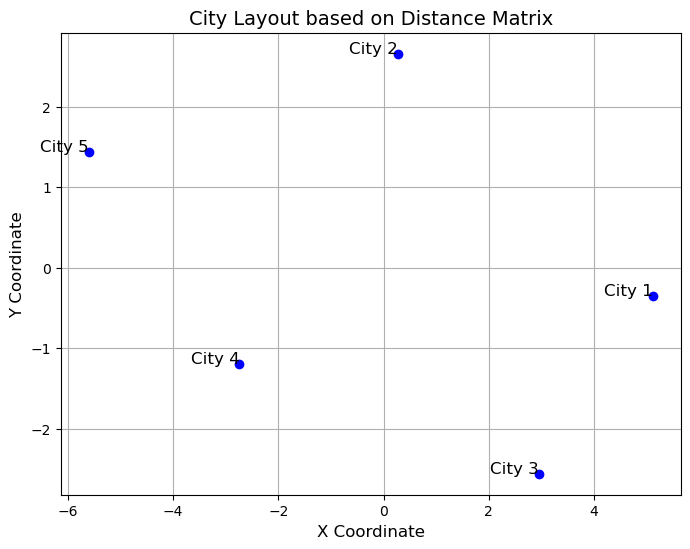

In [10]:
# Distance between the 5 cities (as given in the code)
dists1 = [
    [0, 4, 2, 9, 12],
    [4, 0, 7, 5, 5],
    [2, 7, 0, 4, 10],
    [9, 5, 4, 0, 3],
    [12, 5, 10, 3, 0]
]
# Using Multidimensional Scaling (MDS) to reduce the dimensionality of the distance matrix
from sklearn.manifold import MDS
# Apply MDS to reduce the 5x5 distance matrix to 2D
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(dists1)

# Plotting the cities on a 2D plane
plt.figure(figsize=(8, 6))
plt.scatter(coords[:, 0], coords[:, 1], c='blue', marker='o')
# Label the cities
for i, (x, y) in enumerate(coords):
    plt.text(x, y, f'City {i+1}', fontsize=12, ha='right')
# Adding titles and labels
plt.title('City Layout based on Distance Matrix', fontsize=14)
plt.xlabel('X Coordinate', fontsize=12)
plt.ylabel('Y Coordinate', fontsize=12)
# Show the plot
plt.grid(True)
plt.show()

In [11]:
## Options available in TSP class imported from optimization_algorithms_tools.problems
# gen_method: supports different methods for mutating a new solution from an old one. It can be:
#             'random_swap':  swap 2 citis in the path, it can be done multiple times in for 1 solition 
#                             by using num_swaps. Also, the swap can be done in a smaller window the the whole
#                             path using swap_wind = [1 - n]
#             'reverse':      reverse the order of a subset of the cities with len either random by using rand_len, or
#                             with rev_len which default to 2
#             'insert':       pick a random city and remove from the path and re-inserting it in before a different random
#                             city
#             'mutate':       generate a new solution by radomly mutating the current one
#
# init_method: It support two methods of initializing the path, either:
#             'random':       which means the path is generated completely random
#             'greedy'        which try to select a sup-optimal initial path by selecting the pairwise shortest distances 
#                             between citis. This will not leed to the shortest path but it much better than the random

tsp_sample = TSP(dists=dists, gen_method='random_swap', init_method='random')

In [12]:
# # Options available in SimulatedAnnealing class imported from optimization_algorithms_tools.algorithms
# cooling_schedule
#     'linear'
#     'geometric'
#     'logarithmic'
#     'exponential'
#     'linear_inverse'
sa = SimulatedAnnealing(max_iter=10000, max_iter_per_temp=1,
                        initial_temp=500, 
                        final_temp=50,
                        cooling_schedule='linear_inverse', 
                        cooling_alpha=0.9, debug=1)
sa.run(tsp_sample)

Simulated annealing is initialized:
current value = 18, current temp=500
Simulated Annealing is done: 
curr iter: 5556, curr best value: 18, curr temp:0.0999900009999, curr best: sol: [0, 1, 4, 3, 2, 0]


In [15]:
# hand iteration with debug = 2
sa = SimulatedAnnealing(max_iter=20, max_iter_per_temp=1,
                        initial_temp=500, final_temp=50, cooling_schedule='linear_inverse', cooling_alpha=0.9, debug=2)
sa.run(tsp_sample)

Simulated annealing is initialized:
current value = 30, current temp=500
curr iter: 1, curr value: 29, curr best value: 29, curr temp:500, curr best: sol: [0, 4, 3, 1, 2, 0]
curr iter: 2, curr value: 28, curr best value: 28, curr temp:263.15789473684214, curr best: sol: [0, 4, 1, 3, 2, 0]
curr iter: 3, curr value: 18, curr best value: 18, curr temp:178.57142857142858, curr best: sol: [0, 1, 4, 3, 2, 0]
curr iter: 4, curr value: 30, curr best value: 18, curr temp:135.13513513513513, curr best: sol: [0, 1, 4, 3, 2, 0]
curr iter: 5, curr value: 29, curr best value: 18, curr temp:108.69565217391305, curr best: sol: [0, 1, 4, 3, 2, 0]
curr iter: 6, curr value: 26, curr best value: 18, curr temp:90.9090909090909, curr best: sol: [0, 1, 4, 3, 2, 0]
curr iter: 7, curr value: 29, curr best value: 18, curr temp:78.125, curr best: sol: [0, 1, 4, 3, 2, 0]
curr iter: 8, curr value: 30, curr best value: 18, curr temp:68.4931506849315, curr best: sol: [0, 1, 4, 3, 2, 0]
curr iter: 9, curr value: 37, 